## Connect to Drive

In [ ]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

## Data Analysis

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/indeed_dataset.csv')
df.head()

,Unnamed: 0.1,job_id,job_title,location,experience,education,job_type,job_description,job_link,Unnamed: 0
0,0,d3fe7488bead34f4,Business Analyst,"Austin, TX",ENTRY_LEVEL,BACHELORS_DEGREE,FULLTIME,"LIS Business Analyst (Austin, Texas) - job pos...",https://www.indeed.com/jobs?q=Business+Analyst...,0.0
1,1,0c788d52c2a5420e,Business Analyst,"Austin, TX",ENTRY_LEVEL,BACHELORS_DEGREE,FULLTIME,Systems Operations Analyst - job post CEVA Log...,https://www.indeed.com/jobs?q=Business+Analyst...,1.0
2,2,ee82dee9280384d9,Business Analyst,"Austin, TX",ENTRY_LEVEL,BACHELORS_DEGREE,FULLTIME,Business Intelligence Analyst - job post Hire ...,https://www.indeed.com/jobs?q=Business+Analyst...,2.0
3,3,8df855078f305a53,Business Analyst,"Austin, TX",ENTRY_LEVEL,BACHELORS_DEGREE,FULLTIME,Business Analyst I - job post Silicon Labs Car...,https://www.indeed.com/jobs?q=Business+Analyst...,3.0
4,4,5a563d5d009c2306,Business Analyst,"Austin, TX",ENTRY_LEVEL,BACHELORS_DEGREE,FULLTIME,Business Intelligence Analyst - job post ABRAC...,https://www.indeed.com/jobs?q=Business+Analyst...,4.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14814 entries, 0 to 14813
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0.1     14814 non-null  int64  
 1   job_id           14814 non-null  object 
 2   job_title        14814 non-null  object 
 3   location         14814 non-null  object 
 4   experience       14814 non-null  object 
 5   education        14814 non-null  object 
 6   job_type         14814 non-null  object 
 7   job_description  14814 non-null  object 
 8   job_link         14814 non-null  object 
 9   Unnamed: 0       14814 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 1.1+ MB


In [ ]:
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'job_link', 'job_id'], inplace=True)

In [ ]:
df.head()

,job_title,location,experience,education,job_type,job_description
0,Business Analyst,"Austin, TX",ENTRY_LEVEL,BACHELORS_DEGREE,FULLTIME,"LIS Business Analyst (Austin, Texas) - job pos..."
1,Business Analyst,"Austin, TX",ENTRY_LEVEL,BACHELORS_DEGREE,FULLTIME,Systems Operations Analyst - job post CEVA Log...
2,Business Analyst,"Austin, TX",ENTRY_LEVEL,BACHELORS_DEGREE,FULLTIME,Business Intelligence Analyst - job post Hire ...
3,Business Analyst,"Austin, TX",ENTRY_LEVEL,BACHELORS_DEGREE,FULLTIME,Business Analyst I - job post Silicon Labs Car...
4,Business Analyst,"Austin, TX",ENTRY_LEVEL,BACHELORS_DEGREE,FULLTIME,Business Intelligence Analyst - job post ABRAC...


In [ ]:
# Looking for value counts for each column
for column in df.columns:
  if column == 'job_description':
    continue
  print('-'*50)
  print(f'{column}')
  print('-'*50)
  print(df[column].value_counts())

--------------------------------------------------
job_title
--------------------------------------------------
Software Engineer            3667
Cloud Engineer               2938
Data Analyst                 1956
Data Architect               1499
Business Analyst             1328
Machine Learning Engineer    1045
Data Scientist                887
QA Engineer                   625
Data Engineer                 443
DevOps Engineer               318
QA Analyst                    108
Name: job_title, dtype: int64
--------------------------------------------------
location
--------------------------------------------------
Dallas, TX           3124
San Francisco, CA    2931
Chicago, IL          2052
Austin, TX           1878
Los Angeles, CA      1780
Seattle, WA          1660
San Diego, CA        1389
Name: location, dtype: int64
--------------------------------------------------
experience
--------------------------------------------------
MID_LEVEL       7702
SENIOR_LEVEL    5298
ENTRY_L

In [ ]:
df.head()

,job_title,location,experience,education,job_type,job_description
0,Business Analyst,"Austin, TX",ENTRY_LEVEL,BACHELORS_DEGREE,FULLTIME,"LIS Business Analyst (Austin, Texas) - job pos..."
1,Business Analyst,"Austin, TX",ENTRY_LEVEL,BACHELORS_DEGREE,FULLTIME,Systems Operations Analyst - job post CEVA Log...
2,Business Analyst,"Austin, TX",ENTRY_LEVEL,BACHELORS_DEGREE,FULLTIME,Business Intelligence Analyst - job post Hire ...
3,Business Analyst,"Austin, TX",ENTRY_LEVEL,BACHELORS_DEGREE,FULLTIME,Business Analyst I - job post Silicon Labs Car...
4,Business Analyst,"Austin, TX",ENTRY_LEVEL,BACHELORS_DEGREE,FULLTIME,Business Intelligence Analyst - job post ABRAC...


In [ ]:
# Remove random 10 rows for testing
import random
testing_list = []
for _ in range(10):
  k = random.randint(0, 14800)
  testing_list.append(df.iloc[k])
  df.drop([k], inplace=True)

# Predicting Experience based on Job Description

## Data Preprocessing

### Assign Feature and Target Columns

In [ ]:
X = df['job_description']
y = df['experience']

### Train and Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104, test_size=0.2, shuffle=True)

### Vectorizer

In [ ]:
# CountVectorizer
vectorizer = CountVectorizer()

In [ ]:
# Fitting and Transforming train data
vectorizer.fit(X_train)
X_train_dtm = vectorizer.transform(X_train)
X_train_dtm = vectorizer.fit_transform(X_train)
X_train_dtm

<11843x39693 sparse matrix of type '<class 'numpy.int64'>'
	with 4432571 stored elements in Compressed Sparse Row format>

In [ ]:
# Transforming test data
X_test_dtm = vectorizer.transform(X_test)
X_test_dtm

<2961x39693 sparse matrix of type '<class 'numpy.int64'>'
	with 1110629 stored elements in Compressed Sparse Row format>

## Classifiers

### Multinomial Naive Bayes

In [ ]:
# Initializing
mnb = MultinomialNB()

In [ ]:
# Fitting data to the model
%time mnb.fit(X_train_dtm, y_train)

CPU times: user 46.5 ms, sys: 0 ns, total: 46.5 ms
Wall time: 47.1 ms


MultinomialNB()

In [ ]:
# Predicting
y_pred = mnb.predict(X_test_dtm)

In [ ]:
# Accuracy
metrics.accuracy_score(y_test, y_pred)

0.7338736913204998

In [ ]:
# Classification Report
target_names = y.unique()
print('Classification Report for "experience" column, Multinomial Naive bayes: ')
print(classification_report(y_test, y_pred, target_names=target_names))

Classification Report for "experience" column, Multinomial Naive bayes: 
              precision    recall  f1-score   support

 ENTRY_LEVEL       0.62      0.57      0.60       361
   MID_LEVEL       0.79      0.73      0.76      1510
SENIOR_LEVEL       0.70      0.80      0.74      1090

    accuracy                           0.73      2961
   macro avg       0.70      0.70      0.70      2961
weighted avg       0.74      0.73      0.73      2961



In [ ]:
# Confusion Metrics
cm = metrics.confusion_matrix(y_test, y_pred)

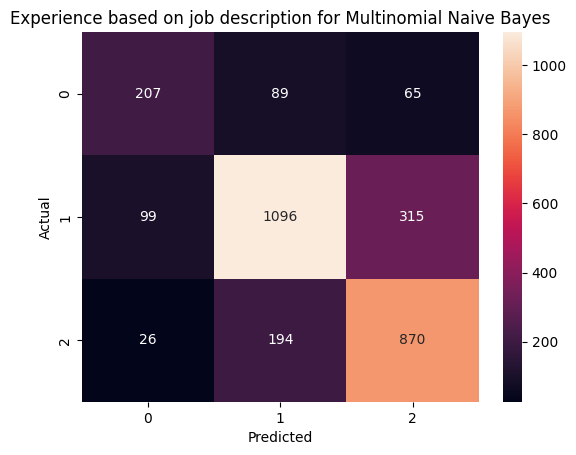

In [ ]:
# Plotting Confusion Metrics
sns.heatmap(cm, annot=True, fmt='1')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Experience based on job description for Multinomial Naive Bayes')
plt.show()

### Gaussian Naive Bayes

In [ ]:
# Initializing
nb = GaussianNB()

In [ ]:
# Fitting data to the model
%time nb.fit(X_train_dtm.toarray(), y_train)

CPU times: user 5.91 s, sys: 4.9 s, total: 10.8 s
Wall time: 15.3 s


GaussianNB()

In [ ]:
# Predicting
y_pred_nb = nb.predict(X_test_dtm.toarray())

In [ ]:
# Accuracy
metrics.accuracy_score(y_test, y_pred_nb)

0.8348530901722391

In [ ]:
# Classification Report
target_names = y.unique()
print('Classification Report for "experience" column, Gaussian Naive bayes: ')
print(classification_report(y_test, y_pred_nb, target_names=target_names))

Classification Report for "experience" column, Gaussian Naive bayes: 
              precision    recall  f1-score   support

 ENTRY_LEVEL       0.79      0.74      0.77       361
   MID_LEVEL       0.88      0.82      0.85      1510
SENIOR_LEVEL       0.79      0.88      0.83      1090

    accuracy                           0.83      2961
   macro avg       0.82      0.82      0.82      2961
weighted avg       0.84      0.83      0.83      2961



In [ ]:
# Confusion Metrics
cm = metrics.confusion_matrix(y_test, y_pred_nb)

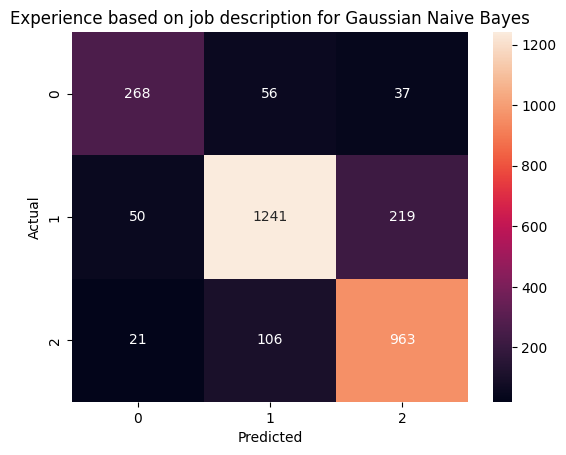

In [ ]:
# Plotting Confusion Metrics
sns.heatmap(cm, annot=True, fmt='1')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Experience based on job description for Gaussian Naive Bayes')
plt.show()

### Support Vector Machine

In [ ]:
# Initializing
svm_model = svm.SVC(kernel='poly', degree=2)

In [ ]:
# Fitting data to the model
%time svm_model.fit(X_train_dtm, y_train)

CPU times: user 5min 54s, sys: 678 ms, total: 5min 55s
Wall time: 6min 9s


SVC(degree=2, kernel='poly')

In [ ]:
# Predicting
y_pred_svm = svm_model.predict(X_test_dtm)

In [ ]:
# Accuracy
metrics.accuracy_score(y_test, y_pred_svm)

0.7315096251266464

In [ ]:
# Classification Report
target_names = y.unique()
print('Classification Report for "experience" column, Support Vector Machine: ')
print(classification_report(y_test, y_pred_svm, target_names=target_names))

Classification Report for "experience" column, Support Vector Machine: 
              precision    recall  f1-score   support

 ENTRY_LEVEL       0.91      0.21      0.34       361
   MID_LEVEL       0.67      0.95      0.79      1510
SENIOR_LEVEL       0.88      0.61      0.72      1090

    accuracy                           0.73      2961
   macro avg       0.82      0.59      0.61      2961
weighted avg       0.78      0.73      0.71      2961



In [ ]:
# Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred_svm)

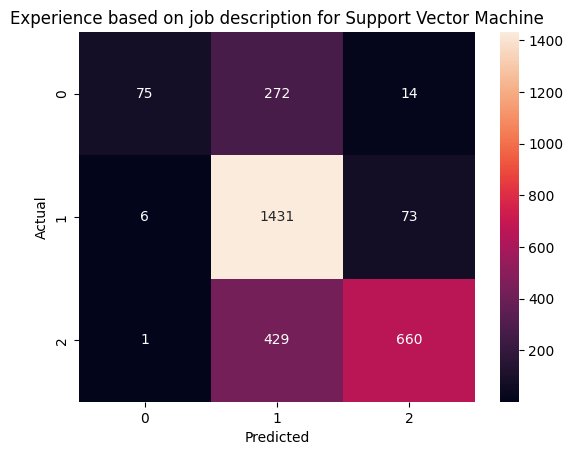

In [ ]:
# Plotting Confusion Metrics
sns.heatmap(cm, annot=True, fmt='1')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Experience based on job description for Support Vector Machine')
plt.show()

### Random Forest Classifier

In [ ]:
# Initializing
rfc = RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
# Fitting data to the model
%time rfc.fit(X_train_dtm, y_train)

CPU times: user 456 ms, sys: 6.99 ms, total: 463 ms
Wall time: 479 ms


RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
# Predicting
y_pred_rf = rfc.predict(X_test_dtm)

In [ ]:
# Accuracy
metrics.accuracy_score(y_test, y_pred_rf)

0.5099628503883823

In [ ]:
# Classification Report
target_names = y.unique()
print('Classification Report for "experience" column, Random Forest Classifier: ')
print(classification_report(y_test, y_pred_rf, target_names=target_names))

Classification Report for "experience" column, Random Forest Classifier: 
              precision    recall  f1-score   support

 ENTRY_LEVEL       0.00      0.00      0.00       361
   MID_LEVEL       0.51      1.00      0.68      1510
SENIOR_LEVEL       0.00      0.00      0.00      1090

    accuracy                           0.51      2961
   macro avg       0.17      0.33      0.23      2961
weighted avg       0.26      0.51      0.34      2961



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Confusion Metrics
cm = metrics.confusion_matrix(y_test, y_pred_rf)

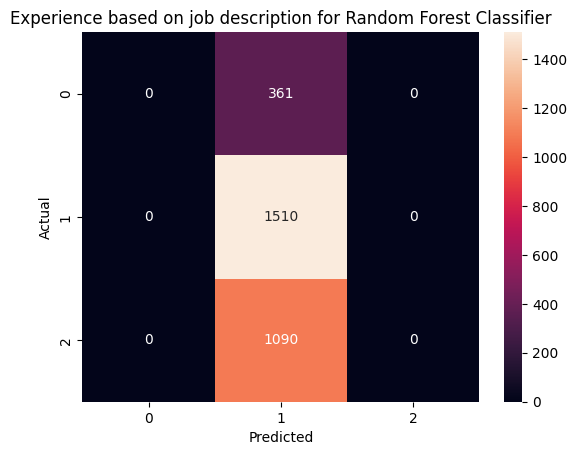

In [ ]:
# Plotting Confusion Metrics
sns.heatmap(cm, annot=True, fmt='1')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Experience based on job description for Random Forest Classifier')
plt.show()

## Testing

In [ ]:
for model in [mnb, nb, svm_model, rfc]:
  correct_answer = 0
  for k in testing_list:
    job_description = k[5]
    test_data = vectorizer.transform([job_description])
    if model == nb:
      y_pred_test = model.predict(test_data.toarray())
    else:
      y_pred_test = model.predict(test_data)
    if y_pred_test[0] == k[2]:
      correct_answer += 1
    print(f'Real experience for ID {k.name} is {k[2]} and predicted experience is {y_pred_test[0]}')
  print('-' * 85)
  print(f'{model} Accuracy: {(correct_answer / len(testing_list)) * 100}')
  print('-' * 85)

Real experience for ID 1143 is SENIOR_LEVEL and predicted experience is MID_LEVEL
Real experience for ID 11751 is ENTRY_LEVEL and predicted experience is MID_LEVEL
Real experience for ID 14466 is MID_LEVEL and predicted experience is MID_LEVEL
Real experience for ID 8953 is ENTRY_LEVEL and predicted experience is ENTRY_LEVEL
Real experience for ID 484 is MID_LEVEL and predicted experience is MID_LEVEL
Real experience for ID 490 is MID_LEVEL and predicted experience is MID_LEVEL
Real experience for ID 10640 is ENTRY_LEVEL and predicted experience is ENTRY_LEVEL
Real experience for ID 7376 is MID_LEVEL and predicted experience is MID_LEVEL
Real experience for ID 13054 is SENIOR_LEVEL and predicted experience is MID_LEVEL
Real experience for ID 3270 is MID_LEVEL and predicted experience is SENIOR_LEVEL
-------------------------------------------------------------------------------------
MultinomialNB() Accuracy: 60.0
------------------------------------------------------------------------

# Predicting Job Type based on Job Description

## Data Preprocessing

### Assign Feature and Target Columns

In [ ]:
X = df['job_description']
y = df['job_type']

### Train and Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104, test_size=0.2, shuffle=True)

### Vectorizer

In [ ]:
vectorizer = CountVectorizer()

In [ ]:
vectorizer.fit(X_train)
X_train_dtm = vectorizer.transform(X_train)
X_train_dtm = vectorizer.fit_transform(X_train)
X_train_dtm

<11843x39693 sparse matrix of type '<class 'numpy.int64'>'
	with 4432571 stored elements in Compressed Sparse Row format>

In [ ]:
X_test_dtm = vectorizer.transform(X_test)
X_test_dtm

<2961x39693 sparse matrix of type '<class 'numpy.int64'>'
	with 1110629 stored elements in Compressed Sparse Row format>

## Classifiers

### Multinomial Naive Bayes

In [ ]:
# Initializing
mnb = MultinomialNB()

In [ ]:
# Fitting data to the model
%time mnb.fit(X_train_dtm, y_train)

CPU times: user 58.3 ms, sys: 990 µs, total: 59.3 ms
Wall time: 59.6 ms


MultinomialNB()

In [ ]:
# Predicting
y_pred = mnb.predict(X_test_dtm)

In [ ]:
# Accuracy
metrics.accuracy_score(y_test, y_pred)

0.8939547450185749

In [ ]:
# Classification Report
target_names = y.unique()
print('Classification Report for "job_type" column, Multinomial Naive Bayes: ')
print(classification_report(y_test, y_pred, target_names=target_names))

Classification Report for "job_type" column, Multinomial Naive Bayes: 
              precision    recall  f1-score   support

    FULLTIME       0.47      0.92      0.62       220
    CONTRACT       0.98      0.91      0.94      2642
    PARTTIME       0.33      0.08      0.12        13
   TEMPORARY       0.56      0.63      0.59        70
  INTERNSHIP       0.75      0.19      0.30        16

    accuracy                           0.89      2961
   macro avg       0.62      0.54      0.52      2961
weighted avg       0.93      0.89      0.90      2961



In [ ]:
# Confusion Metrics
cm = metrics.confusion_matrix(y_test, y_pred)

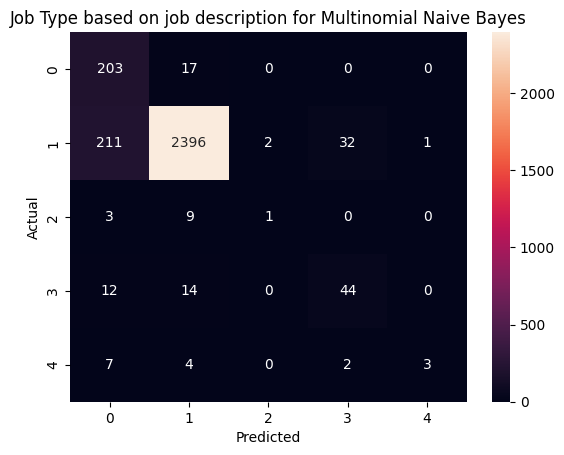

In [ ]:
# Plotting Confusion Metrics
sns.heatmap(cm, annot=True, fmt='1')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Job Type based on job description for Multinomial Naive Bayes')
plt.show()

### Gaussian Naive Bayes

In [ ]:
# Initializing
nb = GaussianNB()

In [ ]:
# Fitting data to the model
%time nb.fit(X_train_dtm.toarray(), y_train)

CPU times: user 4.22 s, sys: 3.8 s, total: 8.02 s
Wall time: 8.08 s


GaussianNB()

In [ ]:
# Predicting
y_pred_nb = nb.predict(X_test_dtm.toarray())

In [ ]:
# Accuracy
metrics.accuracy_score(y_test, y_pred_nb)

0.950354609929078

In [ ]:
# Classification Report
target_names = y.unique()
print('Classification Report for "job_type" column, Gaussian Naive Bayes: ')
print(classification_report(y_test, y_pred_nb, target_names=target_names))

Classification Report for "job_type" column, Gaussian Naive Bayes: 
              precision    recall  f1-score   support

    FULLTIME       0.81      0.81      0.81       220
    CONTRACT       0.98      0.97      0.97      2642
    PARTTIME       0.44      0.54      0.48        13
   TEMPORARY       0.66      0.70      0.68        70
  INTERNSHIP       0.47      0.88      0.61        16

    accuracy                           0.95      2961
   macro avg       0.67      0.78      0.71      2961
weighted avg       0.95      0.95      0.95      2961



In [ ]:
# Confusion Metrics
cm = metrics.confusion_matrix(y_test, y_pred_nb)

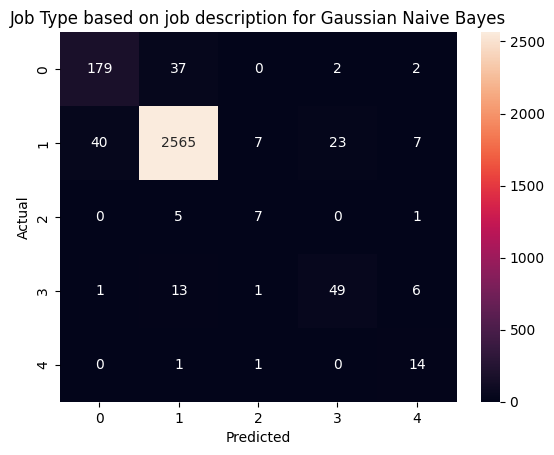

In [ ]:
# Plotting Confusion Metrics
sns.heatmap(cm, annot=True, fmt='1')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Job Type based on job description for Gaussian Naive Bayes')
plt.show()

### Support Vector Machine

In [ ]:
# Initializing
svm_model = svm.SVC(kernel='poly', degree=2)

In [ ]:
# Fitting data to the model
%time svm_model.fit(X_train_dtm, y_train)

CPU times: user 1min 56s, sys: 285 ms, total: 1min 57s
Wall time: 1min 57s


SVC(degree=2, kernel='poly')

In [ ]:
# Predicting
y_pred_svm = svm_model.predict(X_test_dtm)

In [ ]:
# Accuracy
metrics.accuracy_score(y_test, y_pred_svm)

0.9223235393448159

In [ ]:
# Classification Report
target_names = y.unique()
print('Classification Report for "job_type" column, Support Vector Machine: ')
print(classification_report(y_test, y_pred_svm, target_names=target_names))

Classification Report for "job_type" column, Support Vector Machine: 
              precision    recall  f1-score   support

    FULLTIME       0.92      0.33      0.49       220
    CONTRACT       0.93      1.00      0.96      2642
    PARTTIME       0.00      0.00      0.00        13
   TEMPORARY       0.74      0.41      0.53        70
  INTERNSHIP       0.00      0.00      0.00        16

    accuracy                           0.92      2961
   macro avg       0.52      0.35      0.40      2961
weighted avg       0.91      0.92      0.90      2961



In [ ]:
# Confusion Metrics
cm = metrics.confusion_matrix(y_test, y_pred_svm)

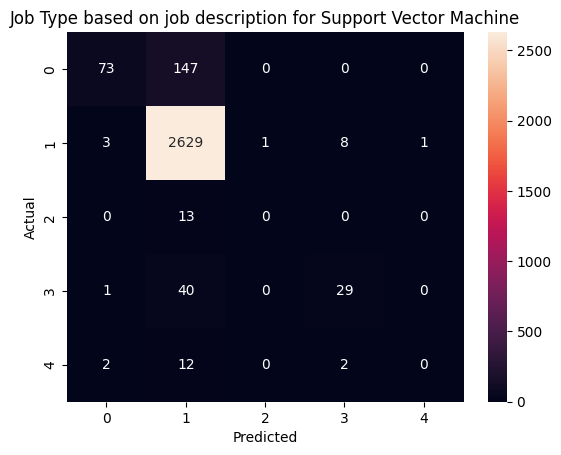

In [ ]:
# Plotting Confusion Metrics
sns.heatmap(cm, annot=True, fmt='1')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Job Type based on job description for Support Vector Machine')
plt.show()

### Random Forest Classifier

In [ ]:
# Initializing
rfc = RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
# Fitting data to the model
%time rfc.fit(X_train_dtm, y_train)

CPU times: user 396 ms, sys: 3.97 ms, total: 400 ms
Wall time: 406 ms


RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
# Predicting
y_pred_rf = rfc.predict(X_test_dtm)

In [ ]:
# Accuracy
metrics.accuracy_score(y_test, y_pred_rf)

0.8922661263086795

In [ ]:
# Classification Report
target_names = y.unique()
print('Classification Report for "job_type" column, Random Forest Claasifier: ')
print(classification_report(y_test, y_pred_rf, target_names=target_names))

Classification Report for "job_type" column, Random Forest Claasifier: 
              precision    recall  f1-score   support

    FULLTIME       0.00      0.00      0.00       220
    CONTRACT       0.89      1.00      0.94      2642
    PARTTIME       0.00      0.00      0.00        13
   TEMPORARY       0.00      0.00      0.00        70
  INTERNSHIP       0.00      0.00      0.00        16

    accuracy                           0.89      2961
   macro avg       0.18      0.20      0.19      2961
weighted avg       0.80      0.89      0.84      2961



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Confusion Metrics
cm = metrics.confusion_matrix(y_test, y_pred_rf)

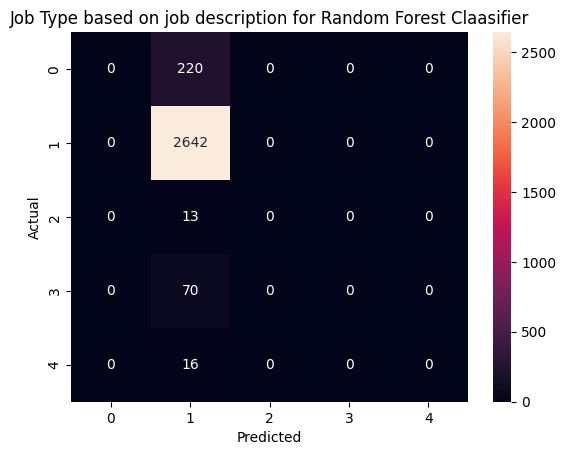

In [ ]:
# Plotting Confusion Metrics
sns.heatmap(cm, annot=True, fmt='1')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Job Type based on job description for Random Forest Claasifier')
plt.show()

## Testing

In [ ]:
for model in [mnb, nb, svm_model, rfc]:
  correct_answer = 0
  for k in testing_list:
    job_description = k[5]
    test_data = vectorizer.transform([job_description])
    if model == nb:
      y_pred_test = model.predict(test_data.toarray())
    else:
      y_pred_test = model.predict(test_data)
    if y_pred_test[0] == k[4]:
      correct_answer += 1
    print(f'Real job type for ID {k.name} is {k[4]} and predicted job type is {y_pred_test[0]}')
  print('-' * 85)
  print(f'{model} Accuracy: {(correct_answer / len(testing_list)) * 100}')
  print('-' * 85)

Real job type for ID 1143 is CONTRACT and predicted job type is CONTRACT
Real job type for ID 11751 is FULLTIME and predicted job type is CONTRACT
Real job type for ID 14466 is FULLTIME and predicted job type is FULLTIME
Real job type for ID 8953 is FULLTIME and predicted job type is FULLTIME
Real job type for ID 484 is FULLTIME and predicted job type is FULLTIME
Real job type for ID 490 is FULLTIME and predicted job type is CONTRACT
Real job type for ID 10640 is CONTRACT and predicted job type is CONTRACT
Real job type for ID 7376 is FULLTIME and predicted job type is FULLTIME
Real job type for ID 13054 is FULLTIME and predicted job type is FULLTIME
Real job type for ID 3270 is FULLTIME and predicted job type is FULLTIME
-------------------------------------------------------------------------------------
MultinomialNB() Accuracy: 80.0
-------------------------------------------------------------------------------------
Real job type for ID 1143 is CONTRACT and predicted job type is C